# Find comets using watershed algorithm ##

## Read image from file 

In [2]:
import datetime
now = datetime.datetime.now()
startNB = now
print("Date and time ",str(now))
#
import sys
import numpy as np
import scipy.ndimage as scimg
import matplotlib.pyplot as plt
%matplotlib inline
#
# Control batch file numbers from  0001 to 0020
# Irradiated batch file numbers from 0001 to 0020
#imFile = "Images/ControlBatch/0020.bmp"
imFile = "Images/IrradiatedBatch/0013.bmp"
imNum = "Ir 13" #Edit this to correspond to image being read - only used for saving data nad plot titles

#MC data file numbers 0*0-00* where * is number 0-9
#imFile = "Images/MCdata/MCimage-pBreak000-000.bmp"

# Read in image
imgRaw = plt.imread(imFile)
#
print(" ")
print("File " + imFile + " read.")
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2021-05-12 12:55:36.798922


 
File Images/IrradiatedBatch/0013.bmp read.
 
Date and time 2021-05-12 12:55:37.056386
Time since last check is 0:00:00.257464


## Routines for converting RGBA images to RGB and RGB to greyscale

In [3]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import numpy as np
#
def rgba2rgb(rgba, background = (255, 255, 255)):
    '''
    Function to convert RGBA images into RGB format. Input RGBA image (and background); output RGB image.
    '''
    rows, cols, chans = rgba.shape
    #
    debug = False
    #
    if debug:
        if chans == 4:
            print("RGBA image")
        elif chans == 3:
            print("RGB image")
            return rgba
        else:
            print("Channel number is",chans)
            sys.exit()
    else:
        assert chans == 4, 'RGBA image must have 4 channels.'
    #
    rgb = np.zeros((rows, cols, 3), dtype = 'float32')
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
    #
    a = np.asarray(a, dtype='float32')/255.0
    #
    R, G, B = background
    #
    rgb[:, :, 0] = r*a + (1.0 - a)*R
    rgb[:, :, 1] = g*a + (1.0 - a)*G
    rgb[:, :, 2] = b*a + (1.0 - a)*B
    #
    return np.asarray(rgb, dtype = np.uint8)
#
def rgb2grey(rgb, negative = 0):
    '''
    Convert RGB image to greyscale. Input RGB (and flag indicating negative required), output greyscale image.
    '''
    rows, cols, chans = rgb.shape
    #
    debug = False
    #
    if debug:
        if chans == 4:
            print("RGBA image")
        elif chans == 3:
            print("RGB image")
        elif chans == 1:
            print("Greyscale image")
            return rgb
        else:
            print("Channel number is",chans)
            sys.exit()
    else:
        assert chans == 3, 'RGB image must have 3 channels.'
    #
    grey = np.zeros((rows, cols), dtype = 'float32')
    #
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    #
    grey[:, :] = (0.2125*(r*negative + (negative - 1.0)*r) + 
                  0.7154*(g*negative + (negative - 1.0)*g) + 
                  0.0721*(b*negative + (negative - 1.0)*b))
    #
    return np.asarray(grey, dtype = np.uint8)
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2021-05-12 12:55:37.073509
 
Date and time 2021-05-12 12:55:37.074938
Time since last check is 0:00:00.001429


## Ceiling division

In [4]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
def ceilDiv(a, b):
    '''
    Return a//b rounded up.
    '''
    ceiling = -(-a//b)
    return ceiling
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2021-05-12 12:55:37.105393
 
Date and time 2021-05-12 12:55:37.105768
Time since last check is 0:00:00.000375


## Initial image processing

Open image, convert to grey scale and apply a range of increasing thresholds.

Date and time  2021-05-12 12:55:37.176843
Type of raw image file is uint8
Type of greyscale image file is uint8
Number of rows 1040 of columns 1392 of pixels 1447680 and depth 4
Maximum value in pixels 244
 
Number of thresholds 2
Number of rows in figure 3


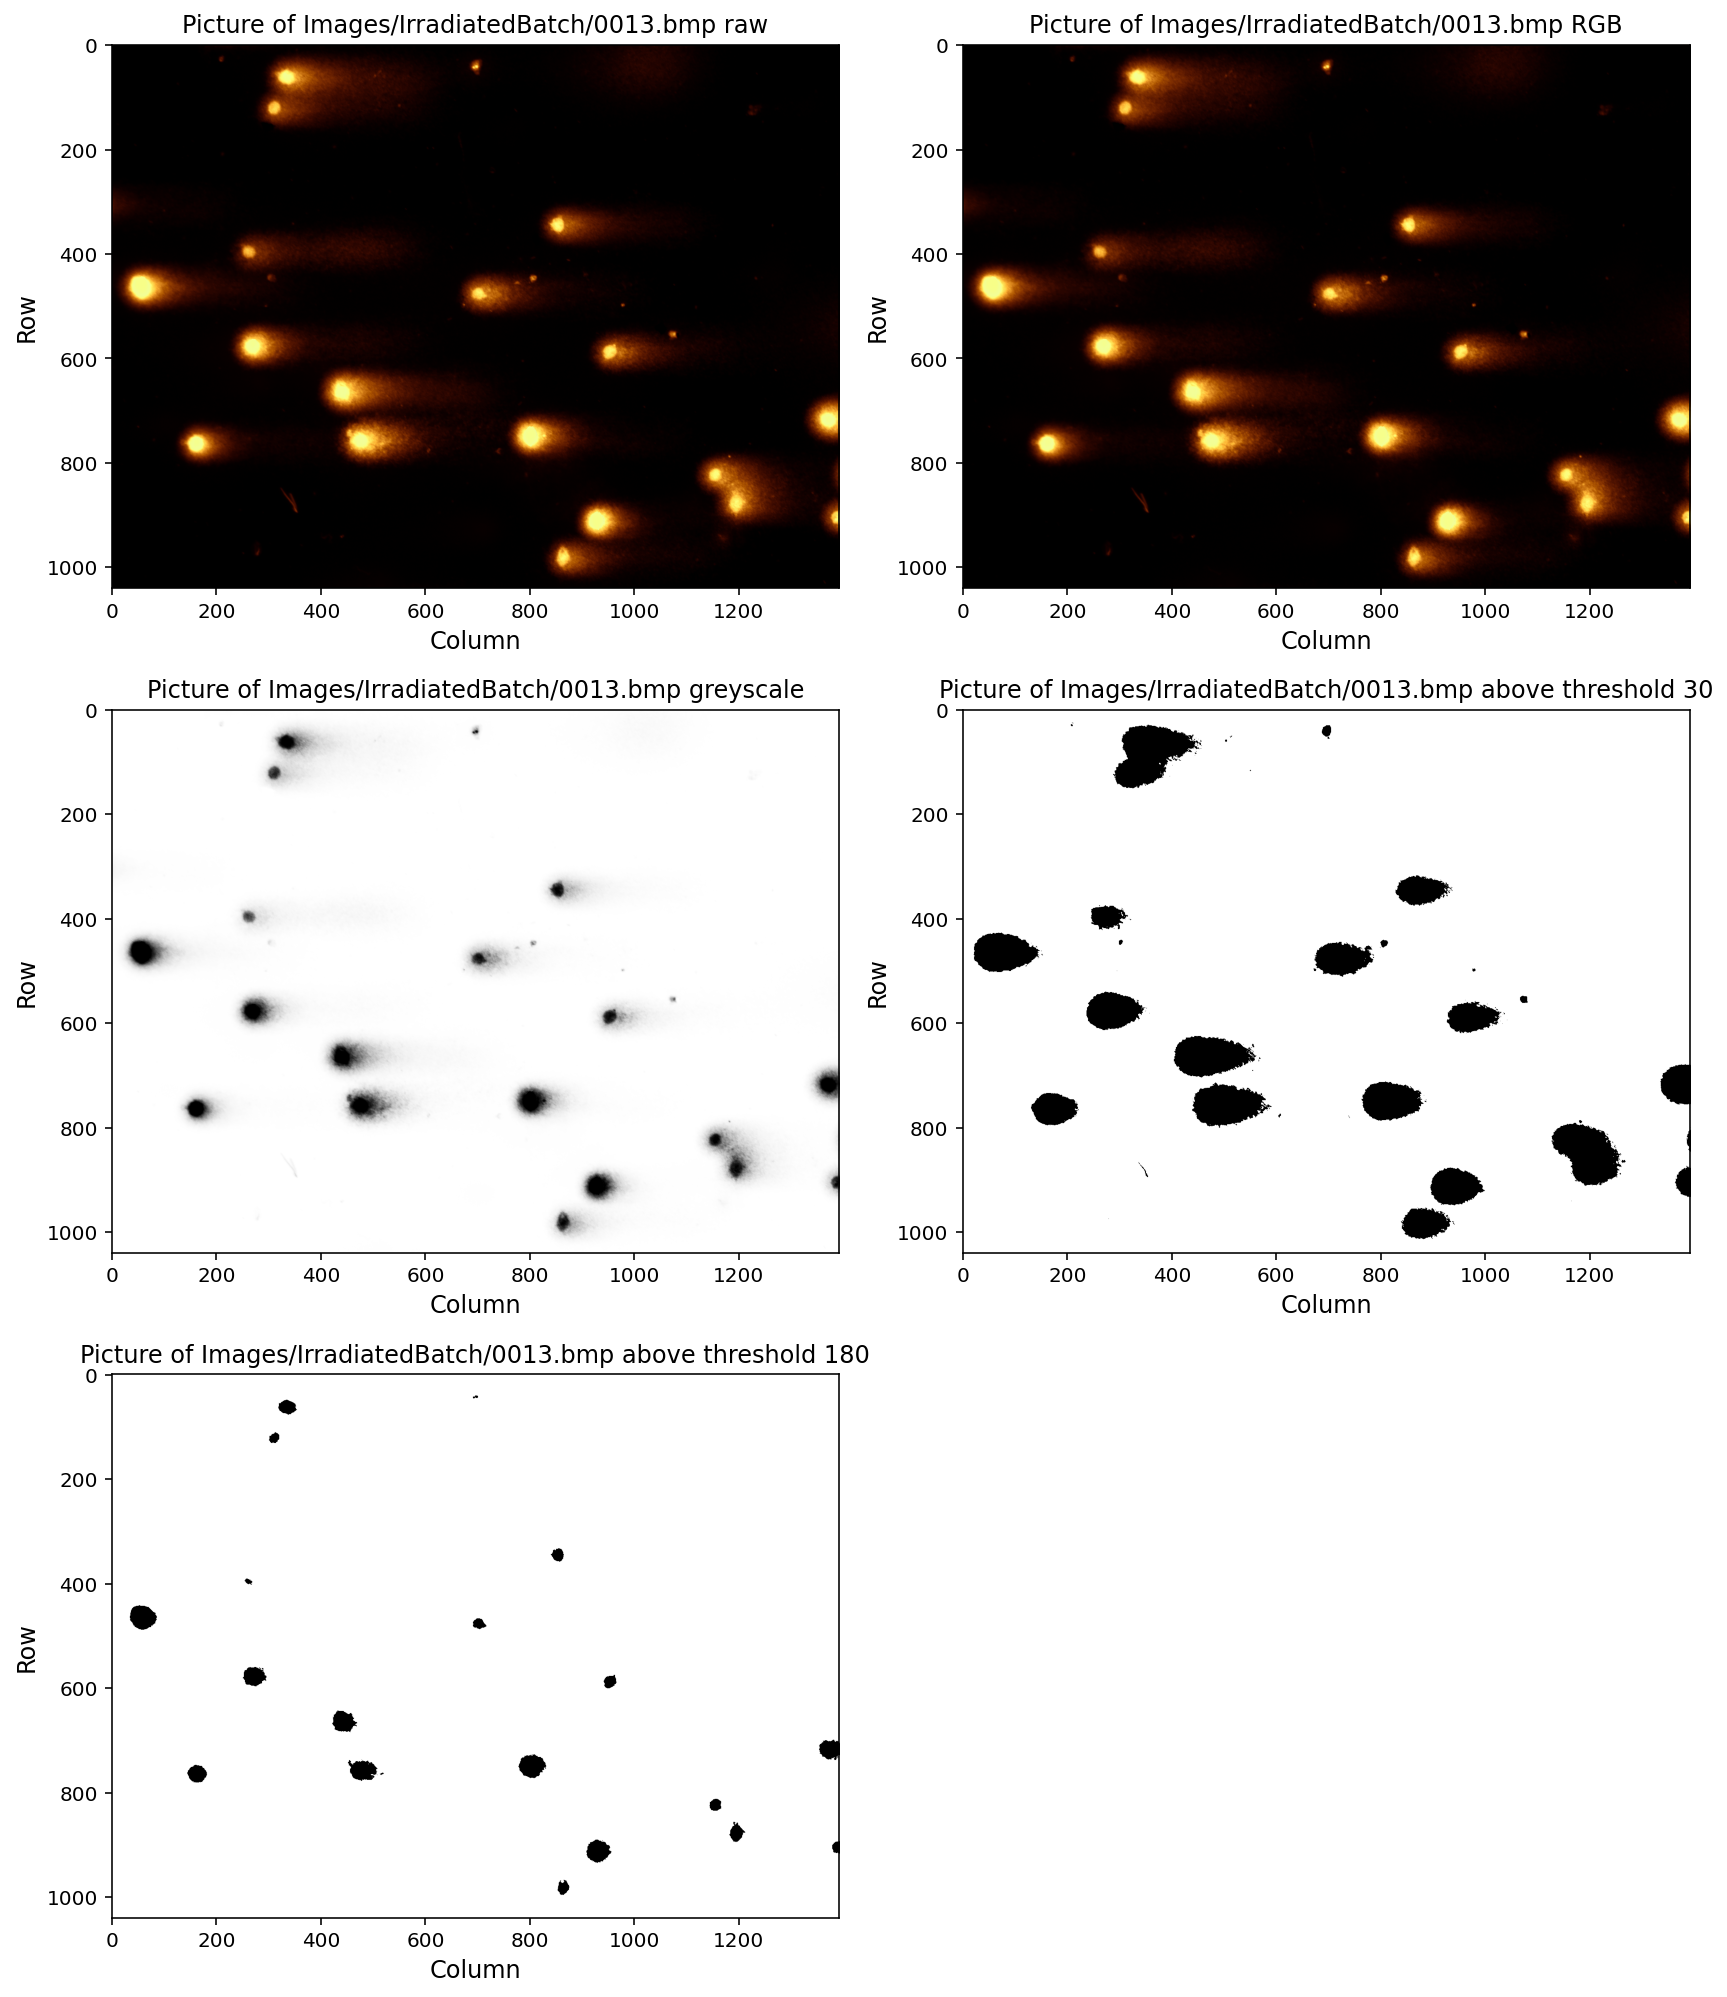

 
Date and time 2021-05-12 12:55:40.097245
Time since last check is 0:00:02.920402


In [5]:
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import sys
import numpy as np
import scipy.ndimage as scimg
import matplotlib.pyplot as plt
%matplotlib inline
# 
# Number of rows and columns. Depth is 3 for RGB, 4 for RGBA image. A is opacity (alpha)
nRows = imgRaw.shape[0] 
nCols = imgRaw.shape[1]
nDepth = imgRaw.shape[2]
#
# Set thresholds for applying to image (lowest to highest)
#thresh = np.array([10, 180]) 
thresh = np.array([30, 180]) 
nThresh = len(thresh)
img = np.zeros((nRows, nCols))
imgThr = np.zeros((nRows, nCols, nThresh))
#
# Determine image format and process accordingly
if nDepth == 4:
    imgRGB = rgba2rgb(imgRaw)
    imgGrey = rgb2grey(imgRGB, 1)
elif nDepth == 3:
    imgRGB = imgRaw
    imgGrey = rgb2grey(imgRGB, 0)
elif nDepth == 1:
    imgRGB = imgRaw
    imgGrey = imgRaw
else:
    print(" ")
    print("Unexpected image depth",nDepth)
    sys.stop()
#
print("Type of raw image file is",imgRaw.dtype)
print("Type of greyscale image file is",imgGrey.dtype)
print("Number of rows",nRows,"of columns",nCols,"of pixels",nRows*nCols,"and depth",nDepth)
print("Maximum value in pixels",np.amax(imgGrey))
#
# Plot image at various stages of processing
nFigRows = 2 + ceilDiv(nThresh, 2)
print(" ")
print("Number of thresholds",nThresh)
print("Number of rows in figure",nFigRows)
for nT in range(0, nThresh):
    imgThr[:, :, nT] = imgGrey > thresh[nT]
#
print(" ")
fig = plt.figure(figsize=(nFigRows*4, 14))
fig.add_subplot(nFigRows, 2, 1)
plt.title("Picture of " + imFile + " raw")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRaw, cmap = "jet")
#
fig.add_subplot(nFigRows, 2, 2)
plt.title("Picture of " + imFile + " RGB")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgRGB, cmap = "jet")
#
fig.add_subplot(nFigRows, 2, 3)
plt.title("Picture of " + imFile + " greyscale")
plt.xlabel('Column', fontsize = 12)
plt.ylabel('Row', fontsize = 12)
imgplot = plt.imshow(imgGrey, cmap = "Greys")
#
for nT in range(0, nThresh):
    fig.add_subplot(nFigRows, 2, 4 + nT)
    plt.title("Picture of " + imFile + " above threshold " + str(thresh[nT]))
    plt.xlabel('Column', fontsize = 12)
    plt.ylabel('Row', fontsize = 12)
    imgplot = plt.imshow(imgThr[:, :, nT], cmap = "Greys")
#
plt.tight_layout()
plt.savefig(imNum + ", Initial.png")
plt.show()
#

then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Identify clusters using watershed algorithm

Identify "clusters" at the lowest threshold and "heads" at the higher threshold.

Date and time  2021-05-12 12:58:31.492706
 
Cluster ID using Watershed algorithm
Cluster threshold 30 , head threshold 180 .
Min number of pixels in cluster 200 , max number 200000 .
Min number of pixels in head 40 , max number 20000 .


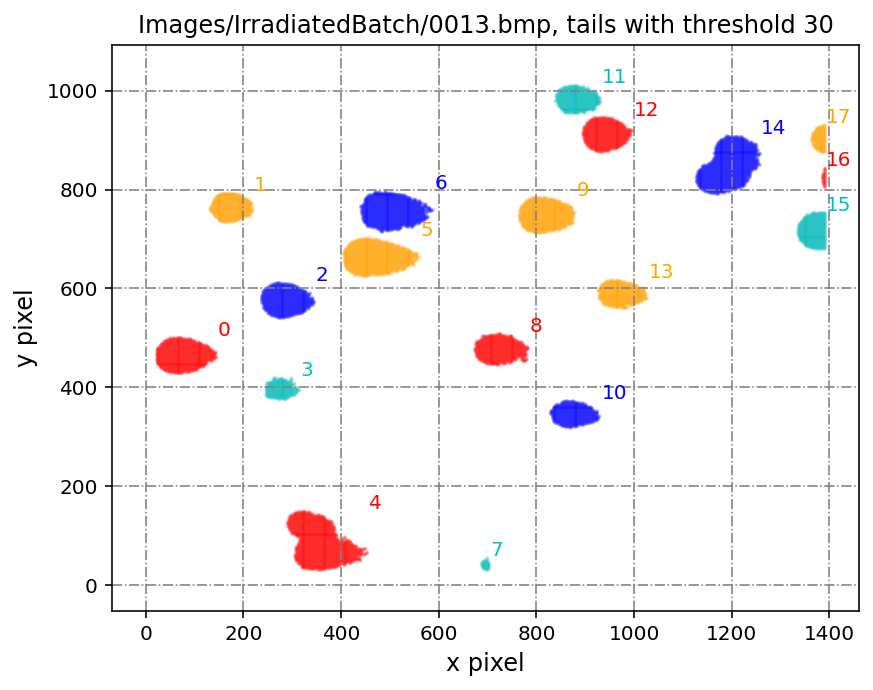

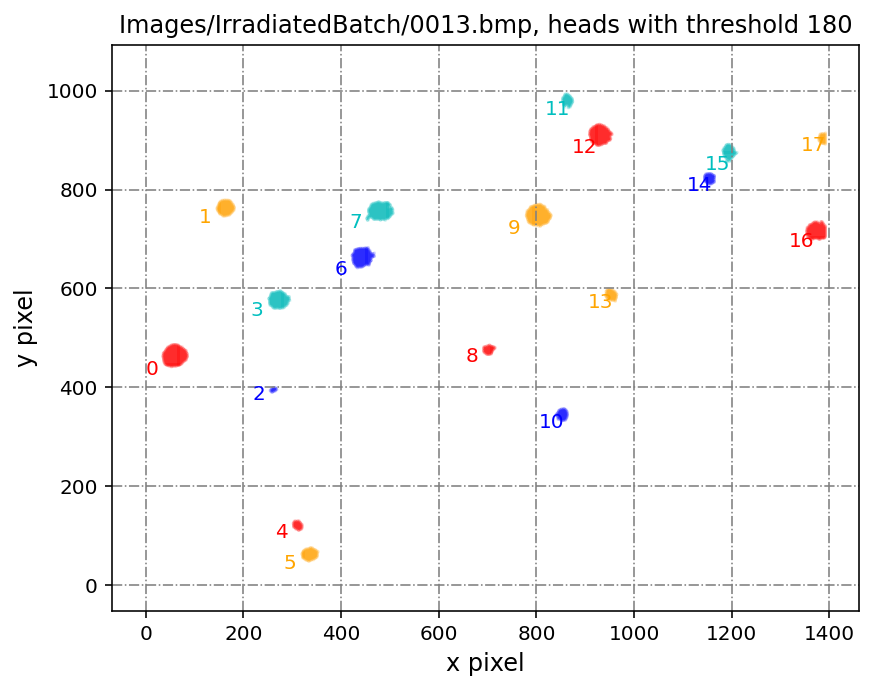

 
Date and time 2021-05-12 12:58:33.796231
Time since last check is 0:00:02.303525


In [7]:
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline
#
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
#
debug = False
if debug:
    print("Running in debug mode!")
    clusPic = np.zeros((nRows, nCols))

#
# Requirements on minimum and maximum number of pixels in wheels at the cluster 
# and head thresholds
minClusPixels = 200
maxClusPixels = 200000
minHeadPixels = 40
maxHeadPixels = 20000
#
print(" ")
print("Cluster ID using Watershed algorithm")
print("Cluster threshold",thresh[0],"\b, head threshold",thresh[1],"\b.")
print("Min number of pixels in cluster",minClusPixels,"\b, max number",maxClusPixels,"\b.")
print("Min number of pixels in head",minHeadPixels,"\b, max number",maxHeadPixels,"\b.")
#
# Define grid of markers and background marker value: 
nStepCols = 3
nStepRows = 3
rMark, cMark = np.ogrid[0:nRows:nStepRows, 0:nCols:nStepCols]
if debug:
    print(" ")
    print("rMark.shape",rMark.shape,"cMark.shape",cMark.shape)
mStart = 1
markers = np.zeros((nRows, nCols)).astype(np.int)
markers[rMark, cMark] = rMark/nStepRows + cMark*nRows/(nStepRows*nStepCols) + mStart
if debug:
    plt.figure(figsize = (6.7, 5.2))
    plt.imshow(markers, cmap = "CMRmap");
#
# Create image with cluster threshold and run watershed algorithm
clusImg = imgGrey > thresh[0]
if debug:
    plt.figure(figsize = (6.7, 5.2))
    plt.imshow(clusImg);
colDotsClus = ndimage.watershed_ift(clusImg.astype(np.uint8), markers)
#
# Remove "isolated" markers (i.e. markers in regions where no cluster found)
colDotsClus[rMark, cMark] = colDotsClus[rMark + 1, cMark]
#
# Find the value of the marker of the last identified regions
mMaxClus = np.amax(colDotsClus)
#
# Positions of marker values
boolClus = colDotsClus >= mStart
nFoundClus = len(np.unique(colDotsClus[boolClus]))
rMarkerClus = np.zeros(nFoundClus)
rMarkerClus = np.unique(colDotsClus[boolClus])
#
# Select the clusters, first pass (determine accepted number). Must exclude tiny clusters (noise) and any 
# really large clusters (background regions in image).
nClus = 0
cMarkerClus = np.zeros(nFoundClus)
maxInDotClus = 0
for nR in range(0, nFoundClus):
    boolClus = colDotsClus == rMarkerClus[nR]
    nHereCl = np.sum(boolClus)
    if nHereCl < minClusPixels or nHereCl > maxClusPixels:
        continue
    maxInDotClus = max(maxInDotClus, nHereCl)
    cMarkerClus[nClus] = rMarkerClus[nR]
    nClus += 1
#
# Create image with head threshold and run watershed algorithm
headImg = imgGrey > thresh[1]
if debug:
    plt.figure(figsize = (6.7, 5.2))
    plt.imshow(headImg);
colDotsHead = ndimage.watershed_ift(headImg.astype(np.uint8), markers)
#
# Remove "isolated" markers
colDotsHead[rMark, cMark] = colDotsHead[rMark + 1, cMark]
#
# Find the value of the marker of the last identified regions.
mMaxHead = np.amax(colDotsHead)
#
# Positions of marker values that are not background
boolHead = colDotsHead > mStart
nFoundHead = len(np.unique(colDotsHead[boolHead]))
rMarkerHead = np.zeros(nFoundHead)
rMarkerHead = np.unique(colDotsHead[boolHead])
#
# Select the heads, first pass (determine accepted number). Must exclude tiny clusters (noise) and any 
# really large clusters (background regions in image).
nHead = 0
cMarkerHead = np.zeros(nFoundHead)
maxInDotHead = 0
for nR in range(0, nFoundHead):
    boolHead = colDotsHead == rMarkerHead[nR]
    nHereHd = np.sum(boolHead)
    if nHereHd < minHeadPixels or nHereHd > maxHeadPixels:
        continue
    maxInDotHead = max(maxInDotHead, nHereHd) 
    cMarkerHead[nHead] = rMarkerHead[nR]
    nHead += 1
#
# Colour table for plots
nColTab = 4
colorTab = ['r', 'orange', 'b', 'c']
#
# Information on clusters
nInCluster = np.zeros(nClus).astype(int)
iClusSum = np.zeros(nClus)
#
# Information on pixels in clusters
lClus = np.sum(clusImg)
#
# Safe size of arrays would be number of pixels in image.
# The factor lFact can be used to expand array sizes
lFact = 4
indexCl = np.zeros(lFact*lClus)
cPixelsCl = np.zeros(lFact*lClus).astype(int)
rPixelsCl = np.zeros(lFact*lClus).astype(int)
iPixelsCl = np.zeros(lFact*lClus)
#
# Information on head
nInHead = np.zeros(nHead).astype(int)
iHeadSum = np.zeros(nHead)
#
# Information on pixels in head (lHead must be large enough)
lHead = lClus
indexHd = np.zeros(lHead)
cPixelsHd = np.zeros(lHead).astype(int)
rPixelsHd = np.zeros(lHead).astype(int)
iPixelsHd = np.zeros(lHead)
#
# Temporary information 
cPixelsHere = np.zeros(lClus).astype(int)
rPixelsHere = np.zeros(lClus).astype(int)
iPixelsHere = np.zeros(lClus)
thisPic = np.zeros((nRows, nCols))
#
# Find pixels in clusters, determine positions and plot 
fig = plt.figure(figsize=(6.7, 5.2))
ax = fig.add_subplot(1, 1, 1)
plt.title(imFile + ", tails with threshold " + str(thresh[0]), fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
#
# Figure control
xOffMax = 2
yOffMax = 2
mSize = 0.001
#
nCol = 0
nLastCl = 0
for nC in range(0, nClus):
    #
    # Clusters
    boolClus = colDotsClus == cMarkerClus[nC]
    nHereCl = np.sum(boolClus).astype(int)
    #
    nInCluster[nC] = nHereCl
    #
    # Indices of x and y pixels
    rPixelsHere, cPixelsHere = np.where(boolClus)
    thisPic.fill(0) 
    thisPic[rPixelsHere, cPixelsHere] = 1
    if debug:
        clusPic += thisPic
    #
    # Intensities in pixels
    iPixelsHere = imgGrey[rPixelsHere, cPixelsHere]
    iClusSum[nC] = np.sum(iPixelsHere)
    #
    indexCl[nLastCl:nLastCl + nHereCl] = nC*np.ones(nHereCl)
    cPixelsCl[nLastCl:nLastCl + nHereCl] = cPixelsHere[:]
    rPixelsCl[nLastCl:nLastCl + nHereCl] = rPixelsHere[:]
    iPixelsCl[nLastCl:nLastCl + nHereCl] = iPixelsHere[:]
    #
    plt.scatter(cPixelsHere, rPixelsHere, s = mSize, c = colorTab[nCol], marker = 'o')
    rLab = np.amax(rPixelsHere[0:nHereCl]) + yOffMax
    cLab = np.amax(cPixelsHere[0:nHereCl]) + xOffMax
    plt.text(cLab, rLab, str(nC), color = colorTab[nCol])
    nCol = nCol + 1
    if nCol > nColTab - 1:
         nCol = 0
    #
    nLastCl = nLastCl + nHereCl
    #
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'grey', linestyle = '-.')
print(" ")
plt.show()
#
# Find pixels in head, determine positions and plot
fig = plt.figure(figsize=(6.7, 5.2))
ax = fig.add_subplot(1, 1, 1)
plt.title(imFile + ", heads with threshold " + str(thresh[1]), fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
#
# Figure control
xOffMin = 15.0
yOffMin = 35.0
mSize = 0.001
#
nCol = 0
nLastHd = 0
for nH in range(0, nHead):
    boolHead = colDotsHead == cMarkerHead[nH]
    nHereHd = np.sum(boolHead).astype(int)
    #
    nInHead[nH] = nHereHd
    #
    # Indices of x and y pixels
    rPixelsHere, cPixelsHere = np.where(boolHead)
    #
    # Intensities in pixels
    iPixelsHere = imgGrey[rPixelsHere, cPixelsHere]
    iHeadSum[nH] = np.sum(iPixelsHere)
    #
    indexHd[nLastHd:nLastHd + nHereHd] = nC*np.ones(nInHead[nH])
    cPixelsHd[nLastHd:nLastHd + nHereHd] = cPixelsHere[0:nHereHd]
    rPixelsHd[nLastHd:nLastHd + nHereHd] = rPixelsHere[0:nHereHd]
    iPixelsHd[nLastHd:nLastHd + nHereHd] = iPixelsHere[0:nHereHd]
    #
    plt.scatter(cPixelsHere, rPixelsHere, s = mSize, c = colorTab[nCol], marker = 'o')
    rLab = np.amin(rPixelsHere) - xOffMin
    cLab = np.amin(cPixelsHere) - yOffMin
    plt.text(cLab, rLab, str(nH), color = colorTab[nCol])
    nCol = nCol + 1
    if nCol > nColTab - 1:
         nCol = 0
    #
    nLastHd = nLastHd + nHereHd
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'grey', linestyle = '-.')
print(" ")
plt.show()
##
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))
#print(np.max(rPixelsCl))

## Both Plots Together

Date and time  2021-05-12 12:59:00.804841


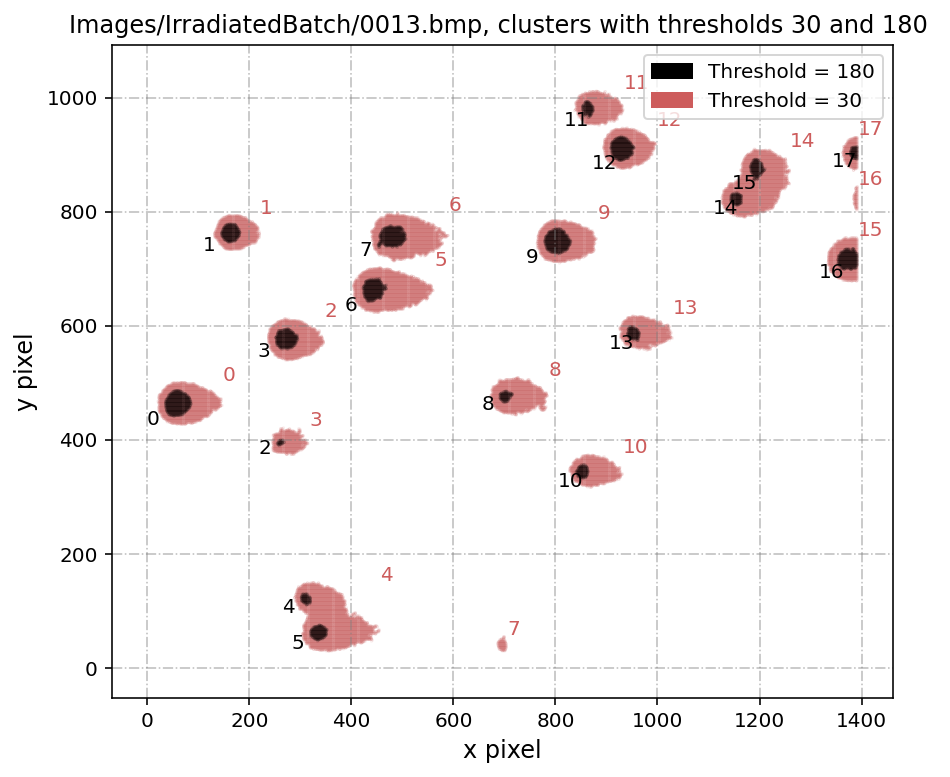

 
Date and time 2021-05-12 12:59:03.272086
Time since last check is 0:00:02.467245


In [8]:
now = datetime.datetime.now()
print("Date and time ",str(now))

import matplotlib.patches as mpatches
fig = plt.figure(figsize=(7, 6))
plt.title(imFile + ", clusters with thresholds 30 and 180 ", fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
plt.grid(color = 'grey', ls = '-.', alpha = 0.5)
#

nCol = 0
nLastCl = 0
for nC in range(0, nClus):
    #
    # Clusters
    boolClus = colDotsClus == cMarkerClus[nC]
    nHereCl = np.sum(boolClus).astype(int)
    #
    nInCluster[nC] = nHereCl
    #
    # Indices of x and y pixels
    rPixelsHere, cPixelsHere = np.where(boolClus)
    thisPic.fill(0) 
    thisPic[rPixelsHere, cPixelsHere] = 1
    if debug:
        clusPic += thisPic
    #
    # Intensities in pixels
    iPixelsHere = imgGrey[rPixelsHere, cPixelsHere]
    iClusSum[nC] = np.sum(iPixelsHere)
    #
    indexCl[nLastCl:nLastCl + nHereCl] = nC*np.ones(nHereCl)
    cPixelsCl[nLastCl:nLastCl + nHereCl] = cPixelsHere[:]
    rPixelsCl[nLastCl:nLastCl + nHereCl] = rPixelsHere[:]
    iPixelsCl[nLastCl:nLastCl + nHereCl] = iPixelsHere[:]
    #
    plt.scatter(cPixelsHere, rPixelsHere, s = mSize, c = 'indianred', marker = 'o')
    rLab = np.amax(rPixelsHere[0:nHereCl]) + yOffMax
    cLab = np.amax(cPixelsHere[0:nHereCl]) + xOffMax
    plt.text(cLab, rLab, str(nC), color = 'indianred')
    nCol = nCol + 1
    if nCol > nColTab - 1:
         nCol = 0
    #
    nLastCl = nLastCl + nHereCl
    #


# Figure control
xOffMin = 15.0
yOffMin = 35.0
mSize = 0.001
#
nLastHd = 0
for nH in range(0, nHead):
    boolHead = colDotsHead == cMarkerHead[nH]
    nHereHd = np.sum(boolHead).astype(int)
    #
    nInHead[nH] = nHereHd
    #
    # Indices of x and y pixels
    rPixelsHere, cPixelsHere = np.where(boolHead)
    #
    # Intensities in pixels
    iPixelsHere = imgGrey[rPixelsHere, cPixelsHere]
    iHeadSum[nH] = np.sum(iPixelsHere)
    #
    indexHd[nLastHd:nLastHd + nHereHd] = nC*np.ones(nInHead[nH])
    cPixelsHd[nLastHd:nLastHd + nHereHd] = cPixelsHere[0:nHereHd]
    rPixelsHd[nLastHd:nLastHd + nHereHd] = rPixelsHere[0:nHereHd]
    iPixelsHd[nLastHd:nLastHd + nHereHd] = iPixelsHere[0:nHereHd]
    #
    plt.scatter(cPixelsHere, rPixelsHere, s = mSize, c = 'k', marker = 'o')
    rLab = np.amin(rPixelsHere) - xOffMin
    cLab = np.amin(cPixelsHere) - yOffMin
    plt.text(cLab, rLab, str(nH), color = 'k')
    nCol = nCol + 1
    if nCol > nColTab - 1:
         nCol = 0
    #
    nLastHd = nLastHd + nHereHd
#
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
Thresh180 = mpatches.Patch(color = 'k', label = 'Threshold = 180')
Thresh30 = mpatches.Patch(color = 'indianred', label = 'Threshold = 30')
plt.legend(handles = [Thresh180, Thresh30], loc = 'best')
plt.savefig(imNum +', Clusters with thresholds 30 and 180.png')
plt.show()

then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time 2021-05-12 13:00:09.727771
 


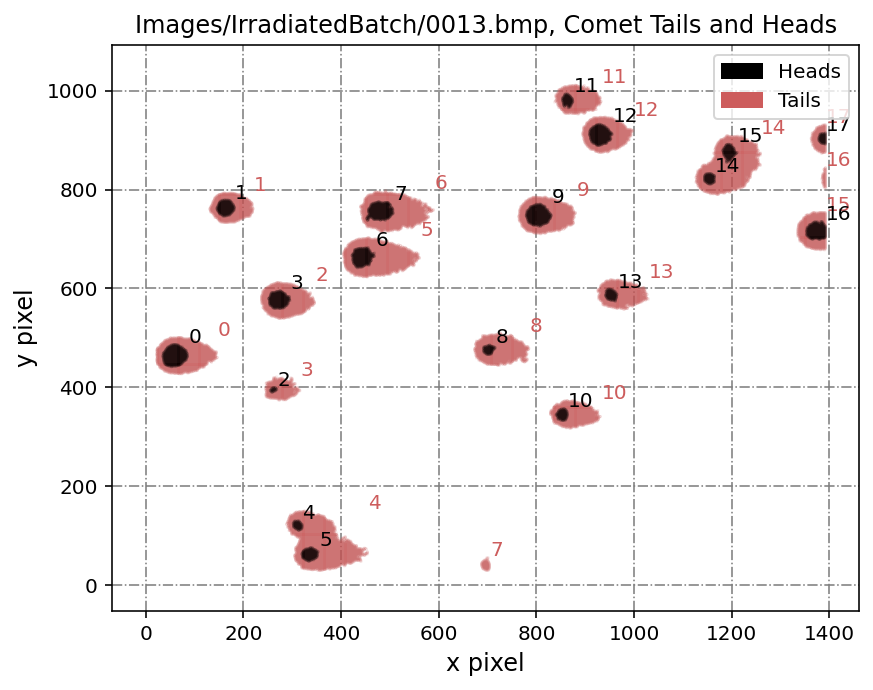

 
Date and time 2021-05-12 13:00:11.847684
Time since last check is 0:00:02.119913


In [10]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
fig = plt.figure(figsize=(6.7, 5.2))
ax = fig.add_subplot(1, 1, 1)
plt.title(imFile + ", Comet Tails and Heads", fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)
#
nCol = 0
#
nLastCl = 0
nLastClEd = 0
for nC in range(0, nClus):# nClus = number of clusters
    #
    # Clusters
    nHereCl = nInCluster[nC] #nInCluster = number of points per cluster so nHereCl is the 
    #number of points in the current cluster- iterating through clusters 0 to nClus
    plt.scatter(cPixelsCl[nLastCl:nLastCl + nHereCl], rPixelsCl[nLastCl:nLastCl + nHereCl], 
                s = mSize, c = 'indianred', marker = 'o', zorder = 2)
    #cPixelsCl - plotting column points within the range nLastCl to nLastCl + nHereCl
    #rPixelsCl - plotting row points within equivalent range
    #np.amax returns maximum of array or maximum along axis 
    rLab = np.amax(rPixelsCl[nLastCl:nLastCl + nHereCl]) + yOffMax #row position for label
    cLab = np.amax(cPixelsCl[nLastCl:nLastCl + nHereCl]) + xOffMax #column position for label
    plt.text(cLab, rLab, str(nC), color = 'indianred') #plot label & iterate through colours
    #to match colour of cluster
    nCol = nCol + 1 #redefine nCol to be nCol + 1
    if nCol > nColTab - 1:
         nCol = 0 #reset nCol to 0 if conditions are met
    #
    nLastCl = nLastCl + nHereCl #redefine nLastCl to run code over next point
    #
#
nCol = 0
nLastHd = 0
for nH in range(0, nHead):
    #
    # Heads
    nHereHd = nInHead[nH]
    plt.scatter(cPixelsHd[nLastHd:nLastHd + nHereHd], rPixelsHd[nLastHd:nLastHd + nHereHd], 
                s = mSize, c = 'k', marker = 'o', zorder = 3)
    rLab = np.amax(rPixelsHd[nLastHd:nLastHd + nHereHd]) + yOffMax 
    cLab = np.amax(cPixelsHd[nLastHd:nLastHd + nHereHd]) + xOffMax
    plt.text(cLab, rLab, str(nH), color = 'k')
    #
    nLastHd = nLastHd + nHereHd
#
head = mpatches.Patch(color = 'k', label = 'Heads')
clus = mpatches.Patch(color = 'indianred', label = 'Tails' )
#
plt.legend(handles = [head, clus], loc = 'best')
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'grey', linestyle ='-.', zorder = 1)
print(" ")
plt.savefig(imNum + ", cluster and head edges.png")
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Find comet Edges

In [9]:
#define table format to display data, if required
from prettytable import PrettyTable
def makePrettyTable(table_col1, table_col2, table_col3):
    table = PrettyTable()
    table.add_column("Index Number", table_col1)
    table.add_column("x_min, x_max", table_col2)
    table.add_column("y_min, y_max", table_col3)
    #
    print(table)

In [11]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
# Clusters

nLastCl = 0

#temporary empty lists 
cMaxCl_l = []
rMaxCl_l = []
cMinCl_l = []
rMinCl_l = []

for i in range(0, nClus):
    nHereCl = nInCluster[i]
    # '.append' - add value within brackets to the array specified
    cMaxCl_l.append(np.amax(cPixelsCl[nLastCl:nLastCl + nHereCl])) #maximum x value
    rMaxCl_l.append(np.amax(rPixelsCl[nLastCl:nLastCl + nHereCl])) #maximum y value
    cMinCl_l.append(np.amin(cPixelsCl[nLastCl:nLastCl + nHereCl])) #minimum x value
    rMinCl_l.append(np.amin(rPixelsCl[nLastCl:nLastCl + nHereCl])) #minimum y value
    #
    nLastCl = nLastCl + nHereCl
    #

x_boundsCl = [[x,y] for x, y in zip(cMinCl_l, cMaxCl_l)]
y_boundsCl = [[x,y] for x, y in zip(rMinCl_l, rMaxCl_l)]

# Heads

nLastHd = 0
#nLastHdEd = 0
#
cMaxHd_l = []
rMaxHd_l = []
cMinHd_l = []
rMinHd_l = []
#
for j in range(0, nHead):
    nHereHd = nInHead[j]
    #
    cMaxHd_l.append(np.amax(cPixelsHd[nLastHd:nLastHd + nHereHd]))#maximum x value
    rMaxHd_l.append(np.amax(rPixelsHd[nLastHd:nLastHd + nHereHd]))#maximum y value
    cMinHd_l.append(np.amin(cPixelsHd[nLastHd:nLastHd + nHereHd]))#minimum x value
    rMinHd_l.append(np.amin(rPixelsHd[nLastHd:nLastHd + nHereHd]))#minimum y value
    #
    nLastHd = nLastHd + nHereHd
    #

x_boundsHd = [[x,y] for x, y in zip(cMinHd_l, cMaxHd_l)]
y_boundsHd = [[x,y] for x, y in zip(rMinHd_l, rMaxHd_l)]
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time 2021-05-12 13:01:15.494757
 
Date and time 2021-05-12 13:01:15.499457
Time since last check is 0:00:00.004700


## Implement Edges and Check for 1 Head per Cluster

Date and time 2021-05-12 13:01:44.007619
 


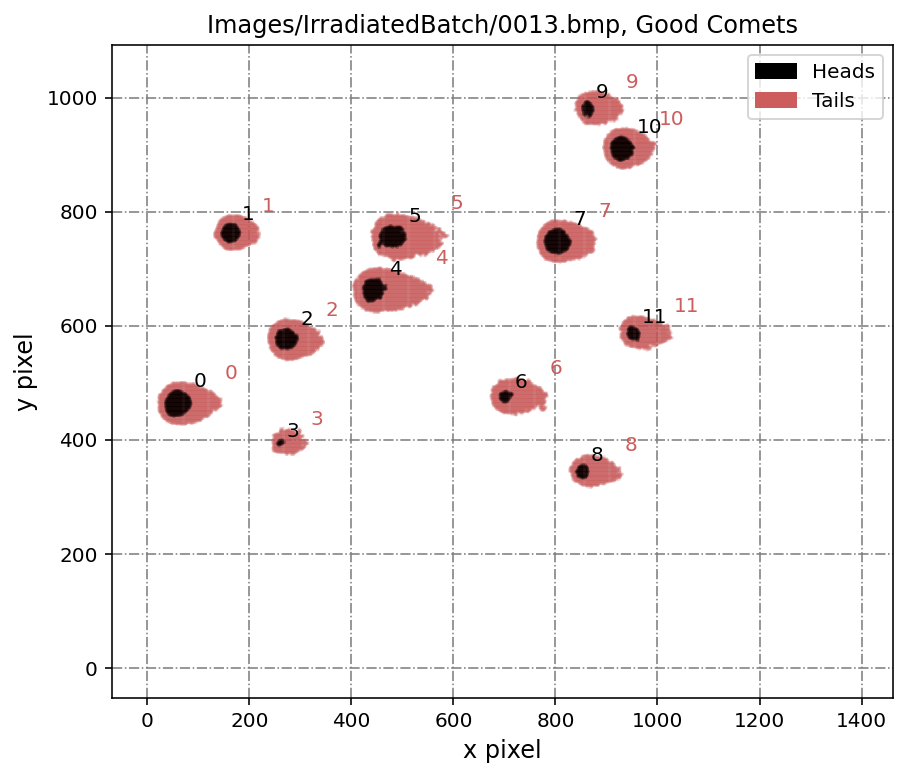

 
Date and time 2021-05-12 13:01:45.445724
Time since last check is 0:00:01.438105


In [12]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
#set initial number of good clusters as 0
nGoodClus = 0

#Clusters
clus_num = np.zeros(nClus).astype(int) 
#create array of zeroes with length nClus,type = integer
clus_row = np.zeros((nClus, np.amax(nInCluster))).astype(int) 
#empty integer array with shape (nClus, np.amax(nInCluster))
clus_col = np.zeros((nClus, np.amax(nInCluster))).astype(int)
#
#set limits of plot
xMin = 0.01*nCols
xMax = 0.99*nCols
yMin = 0.01*nRows
yMax = 0.99*nRows
#
#Heads
head_num = np.zeros(nHead).astype(int)
head_row = np.zeros((nHead, np.amax(nInHead))).astype(int)
head_col = np.zeros((nHead, np.amax(nInHead))).astype(int)
#
nLastCl = 0
for nC in range(0, nClus):
    nHereCl = nInCluster[nC] 
    #
    # Check if any head is inside cluster 
    headsInThisClus = 0 #set start value
    nLastHd = 0
    for nH in range(0, nHead):
        nHereHd = nInHead[nH] 
        #
        # If colMinCl < colMinHd and colMaxCl > colMaxHd
        # and rowMinCl < rowMinHd and rowMaxCl > rowMaxHd then head is in comet
        if cMinCl_l[nC] > xMin and cMaxCl_l[nC] < xMax and yMin < rMinCl_l[nC] and \
        yMax > rMaxCl_l[nC] and xMin < cMinHd_l[nH] and xMax > cMaxHd_l[nH] and \
        yMin < rMinHd_l[nH] and yMax > rMaxHd_l[nH]:
            if cMinCl_l[nC] < cMinHd_l[nH] and cMaxCl_l[nC] > cMaxHd_l[nH] and \
            rMinCl_l[nC] < rMinHd_l[nH] and rMaxCl_l[nC] > rMaxHd_l[nH]:
                headsInThisClus += 1
                nLastHdSel = nLastHd
                nHereHdSel = nHereHd
                nHsel = nH
        #
        nLastHd = nLastHd + nHereHd
    #
    #sum number of head in cluster
    if headsInThisClus == 1:
        clus_num[nGoodClus] = nInCluster[nC]
        head_num[nGoodClus] = nInHead[nHsel]
        clus_row[nGoodClus, 0:nHereCl] = rPixelsCl[nLastCl:nLastCl + nHereCl]
        clus_col[nGoodClus, 0:nHereCl] = cPixelsCl[nLastCl:nLastCl + nHereCl]
        head_row[nGoodClus, 0:nHereHdSel] = rPixelsHd[nLastHdSel:nLastHdSel + nHereHdSel]
        head_col[nGoodClus, 0:nHereHdSel] = cPixelsHd[nLastHdSel:nLastHdSel + nHereHdSel]
        nGoodClus += 1
        #
    nLastCl = nLastCl + nHereCl


fig = plt.figure(figsize=(7, 6))
plt.title(imFile + ", Good Comets", fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)

# Figure control
xOffMax = 5.0
yOffMax = 5.0
mSize = 0.002
#
for nG in range(0, nGoodClus):
    plt.scatter(clus_col[nG, 0:clus_num[nG]], clus_row[nG, 0:clus_num[nG]], s = mSize,\
                color = 'indianred', zorder = 2)
    rLabCl = np.amax(clus_row[nG, 0:clus_num[nG]]) + yOffMax
    cLabCl = np.amax(clus_col[nG, 0:clus_num[nG]]) + xOffMax
    plt.text(cLabCl, rLabCl, str(nG),  c = 'indianred') 
    plt.scatter(head_col[nG, 0:head_num[nG]], head_row[nG, 0:head_num[nG]], s = mSize, \
                color = 'k', zorder = 3)
    rLabHd = np.amax(head_row[nG, 0:head_num[nG]]) + yOffMax
    cLabHd = np.amax(head_col[nG, 0:head_num[nG]]) + xOffMax
    plt.text(cLabHd, rLabHd, str(nG),  c = 'k') 
#

head = mpatches.Patch(color = 'k', label = 'Heads')
clus = mpatches.Patch(color = 'indianred', label = 'Tails' )
#
plt.legend(handles = [head, clus], loc = 'best')
plt.xlim(-0.05*nCols, 1.05*nCols)
plt.ylim(-0.05*nRows, 1.05*nRows)
plt.grid(color = 'grey', linestyle ='-.', zorder = 1)
print(" ")

plt.savefig(imNum + ", Good Comets.png")
plt.show()

then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

In [13]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
headSum = np.zeros(nGoodClus) #array of zeros for head with length nGoodClus
clusSum = np.zeros(nGoodClus) #array of zeros for cluster with length nGoodClus

for nG in range(0, nGoodClus): #for each of the good clusters
    clusSum[nG] = np.sum(imgGrey[clus_row[nG, 0:clus_num[nG]], clus_col[nG, 0:clus_num[nG]]]) 
    #sum number of points in cluster using imgGrey data
    #sum for each value of nG, over the range 0 to clus_num[nG] - clus_num = cluster number
    #
    headSum[nG] = np.sum(imgGrey[head_row[nG, 0:head_num[nG]], head_col[nG, 0:head_num[nG]]]) 
    #sum number of points in head
print(" ")
print("clusSum",clusSum)
print("headSum",headSum)

then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time 2021-05-12 13:02:35.729345
 
clusSum [804554. 450015. 631608. 151639. 868594. 891284. 412983. 763745. 325697.
 337045. 645833. 346886.]
headSum [422079. 217436. 274249.  20736. 307091. 349908.  78702. 388638.  99207.
  96455. 341806.  99885.]
 
Date and time 2021-05-12 13:02:35.732662
Time since last check is 0:00:00.003317


## Centre Points 

Date and time 2021-05-12 13:02:56.731559
 


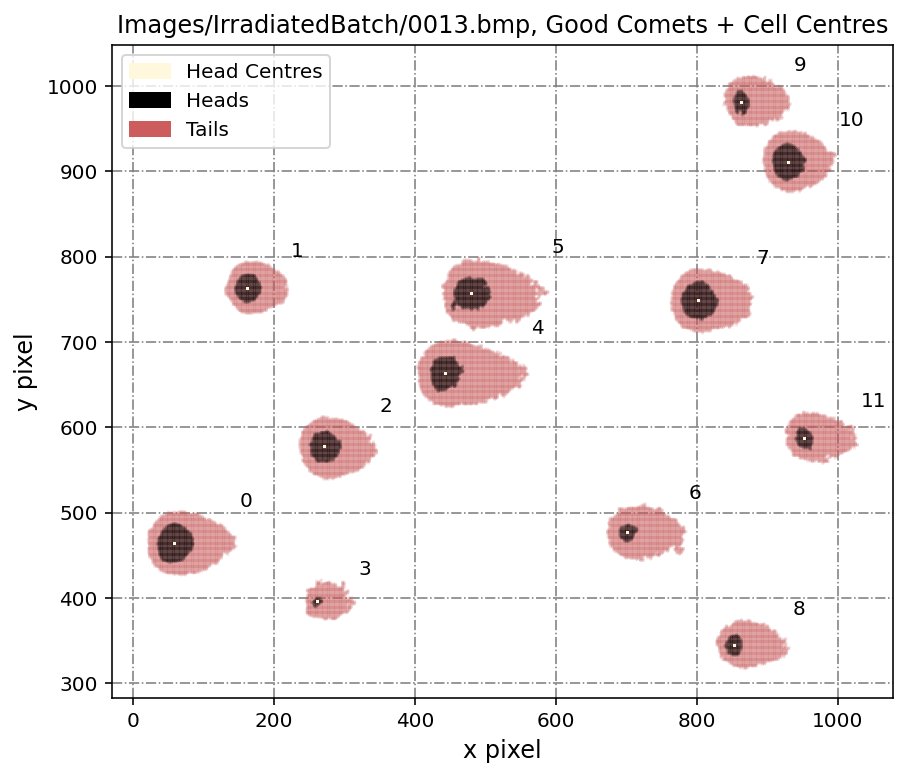

 
Date and time 2021-05-12 13:02:58.554164
Time since last check is 0:00:01.822605


In [14]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
cHeadMid = np.zeros(nGoodClus) 
rHeadMid = np.zeros(nGoodClus) 
cWeightedMid = np.zeros(nGoodClus)
rWeightedMid = np.zeros(nGoodClus)

for nG in range(0, nGoodClus):
    cHeadMid[nG] = np.average(head_col[nG, 0:head_num[nG]]) #x coord of head centre point
    rHeadMid[nG] = np.average(head_row[nG, 0:head_num[nG]]) # ycoord

for nG in range(0, nGoodClus):
    #
    cWeightedMid[nG] = np.sum(imgGrey[head_row[nG, 0:head_num[nG]], head_col[nG, 0:head_num[nG]]]\
                              *head_col[nG, 0:head_num[nG]])/headSum[nG]
    #x coord of weighted mid point- sum values over ranges specified in the brackes & divide by 
    #the number of points in head
    #
    rWeightedMid[nG] = np.sum(imgGrey[head_row[nG, 0:head_num[nG]], head_col[nG, 0:head_num[nG]]]\
                              *head_row[nG, 0:head_num[nG]])/headSum[nG]
    #y coord of weighted mid point


fig = plt.figure(figsize=(7, 6))
plt.title(imFile + ", Good Comets + Cell Centres", fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)


for nG in range(0, nGoodClus):
    plt.scatter(clus_col[nG, 0:clus_num[nG]], clus_row[nG, 0:clus_num[nG]], s = mSize, \
                color = 'indianred', zorder = 2) #plot comet data
    plt.scatter(head_col[nG, 0:head_num[nG]], head_row[nG, 0:head_num[nG]], s = mSize, \
                color = 'k', zorder = 3) # plot head data
    rLabCl = np.amax(clus_row[nG, 0:clus_num[nG]]) + yOffMax
    cLabCl = np.amax(clus_col[nG, 0:clus_num[nG]]) + xOffMax
    plt.text(cLabCl, rLabCl, str(nG),  c = 'k') 
    rLabHd = np.amax(head_row[nG, 0:head_num[nG]]) + yOffMax
    cLabHd = np.amax(head_col[nG, 0:head_num[nG]]) + xOffMax

for nG in range(0, nGoodClus):
    plt.scatter(cWeightedMid[nG], rWeightedMid[nG], s = 2, c=  'cornsilk', marker ='+', zorder = 4) 
    # plot mid points
#
midpt = mpatches.Patch(color = 'cornsilk', label = 'Head Centres')
head = mpatches.Patch(color = 'k', label = 'Heads')
clus = mpatches.Patch(color = 'indianred', label = 'Tails' )

plt.legend(handles = [midpt, head, clus], loc = 'best')
plt.grid(color = 'grey', linestyle ='-.', zorder = 1)
print(" ")

plt.savefig(imNum + ", Good Comets + Cell Centres.png")
plt.show()

then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Find Intensities of Left and Right Hand Sides of Centre

Date and time 2021-05-12 13:03:27.819331
 


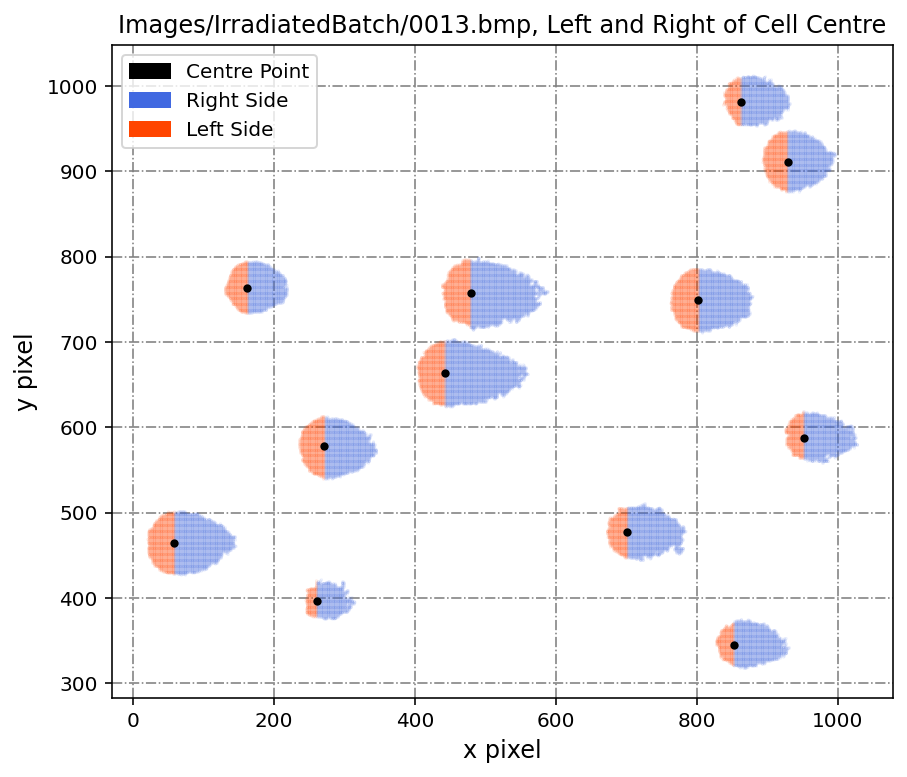

 
Date and time 2021-05-12 13:03:30.090740
Time since last check is 0:00:02.271409


In [15]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
#empty arrays
pnts_num_left = np.zeros(nGoodClus).astype(int)
pnts_row_left = np.zeros((nGoodClus, np.amax(nInCluster))).astype(int)
pnts_col_left = np.zeros((nGoodClus, np.amax(nInCluster))).astype(int)

pnts_num_right = np.zeros(nGoodClus).astype(int)
pnts_row_right = np.zeros((nGoodClus, np.amax(nInCluster))).astype(int)
pnts_col_right = np.zeros((nGoodClus, np.amax(nInCluster))).astype(int)

fig = plt.figure(figsize=(7,6))
plt.title(imFile + ", Left and Right of Cell Centre", fontsize = 12)
plt.xlabel('x pixel', fontsize = 12)
plt.ylabel('y pixel', fontsize = 12)

for nG in range(0, nGoodClus):
    #define current row and column
    row_here = clus_row[nG, 0:clus_num[nG]]
    col_here = clus_col[nG, 0:clus_num[nG]]
    #
    #check current column is less than midpoint- defines points to left of centre
    boolLeft = col_here < cWeightedMid[nG]
    pnts_num_left[nG] = np.sum(boolLeft) #sum number points to left
    pnts_row_left[nG, 0:pnts_num_left[nG]] = row_here[boolLeft]
    pnts_col_left[nG, 0:pnts_num_left[nG]] = col_here[boolLeft]
    #
    #check if current column is greater than midpoint- defines points to right of centre
    boolRight = col_here > cWeightedMid[nG]
    pnts_num_right[nG] = np.sum(boolRight) #sum number of points to right
    pnts_row_right[nG, 0:pnts_num_right[nG]] = row_here[boolRight]
    pnts_col_right[nG, 0:pnts_num_right[nG]] = col_here[boolRight]
    #
    #plot points
    plt.scatter(pnts_col_left[nG, 0:pnts_num_left[nG]], pnts_row_left[nG, 0:pnts_num_left[nG]], \
                s = 0.001, color = 'orangered', zorder = 2)
    plt.scatter(pnts_col_right[nG, 0:pnts_num_right[nG]], pnts_row_right[nG, 0:pnts_num_right[nG]],\
                s = 0.001, color = 'royalblue', zorder = 2)
    plt.scatter(cWeightedMid[nG], rWeightedMid[nG], s = 10, c=  'k', zorder = 3)
#
midpt = mpatches.Patch(color = 'k', label = 'Centre Point')
Right = mpatches.Patch(color = 'royalblue', label = 'Right Side')
Left = mpatches.Patch(color = 'orangered', label = 'Left Side' )

plt.legend(handles = [midpt, Right, Left], loc = 'best')
plt.grid(color = 'grey', linestyle ='-.', zorder = 1)
print(" ")
plt.savefig(imNum + ", left and right of cell centre.png")
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Add up intensities on the left and right (L and R respectively), then form asymmetry: $$A = \frac{R - L}{R + L}$$

Control images are roughly circular.

If we assume L is unchanged*, we can assume R would mirror L had the cell not been irradiated. So by subtracting the intensity of L from R and dividing by the whole intensity, the proportion of DNA that has 'drifted' to the right during electrophoresis can be calculated. The drift is correlated to DNA damage.

*from its un-irradiated position

In [16]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
#temporary empty arrays 
Lint = np.zeros(nGoodClus) #intensities on left
Rint = np.zeros(nGoodClus) #intensities on right
Aint = np.zeros(nGoodClus) #asymmetry in intensities


for nG in range(0, nGoodClus):
    #
    Lint[nG] = np.sum(imgGrey[pnts_row_left[nG, 0:pnts_num_left[nG]], \
                              pnts_col_left[nG, 0:pnts_num_left[nG]]]) #sum intensities on left
    #
    Rint[nG] = np.sum(imgGrey[pnts_row_right[nG, 0:pnts_num_right[nG]], \
                              pnts_col_right[nG, 0:pnts_num_right[nG]]]) #sum intensities on right
    #
    Aint[nG] = (Rint[nG] - Lint[nG])/(Rint[nG] + Lint[nG])
    # asymmetry between left and right hand sides

    
def PrettyTable3(table_col1, table_col2, table_col3):
    table = PrettyTable()
    table.add_column("LHS Intensity", table_col1)
    table.add_column("RHS Intensity", table_col2)
    table.add_column("A (%)", table_col3)
    #
    print(table)
    
PrettyTable3(Lint, Rint, Aint*100)

then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time 2021-05-12 13:04:21.888674
+---------------+---------------+--------------------+
| LHS Intensity | RHS Intensity |       A (%)        |
+---------------+---------------+--------------------+
|    322777.0   |    481777.0   | 19.762501957606325 |
|    182471.0   |    267544.0   | 18.90448096174572  |
|    252727.0   |    378881.0   | 19.97346455396385  |
|    47343.0    |    104296.0   | 37.55827986204076  |
|    293938.0   |    574656.0   | 32.31866671885829  |
|    308339.0   |    582945.0   | 30.810157031877605 |
|    114378.0   |    298605.0   | 44.608857991733316 |
|    321318.0   |    442427.0   | 15.857256021316015 |
|    95216.0    |    230481.0   | 41.53093212402939  |
|    102506.0   |    234539.0   | 39.17370084113397  |
|    266431.0   |    379402.0   | 17.49229289924795  |
|    105344.0   |    241542.0   | 39.26304318998172  |
+---------------+---------------+--------------------+
 
Date and time 2021-05-12 13:04:21.893720
Time since last check is 0:00:00.005

## Asymmetries

In [25]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
#
A = Aint*100 #convert to percentage asymmetry
Asym_sum = np.sum(A) #sum of asymmetries
Av = Asym_sum/nGoodClus #find mean of asymmetry values


Av_err = np.std(A, ddof = 1)/np.sqrt(nGoodClus)#standard deviations

#save values to txt file for ease of reviewing and analysis
with open("Isobel - Irradiated Asymmetries.txt", "a") as data_file: 
    data_file.write(f'{imNum}, {Av} , \u00B1 , {Av_err} \n')

#EQUIVALENT CODE FOR CONTROL BATCH
    
#with open("Isobel - Control Asymmetries.txt", "a") as data_file: 
#    data_file.write(f'{imNum}, {Av} , \u00B1 , {Av_err} \n')



then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time 2021-05-12 13:56:19.036701
 
Date and time 2021-05-12 13:56:19.037752
Time since last check is 0:00:00.001051


## Average Asymmetry 
### Not run for each image, only for analysis purposes

In [19]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
print("")
#
import pandas as pd

irr = pd.read_csv('Isobel - Irradiated Asymmetries.txt', sep = '\s+', header = None)
# read in data file
irr = pd.DataFrame(irr)

irr_av = np.mean(irr[2])
#average irradiated asymmetry is taken as the mean of the average intensity of each irradiated image
print('Irradiated Batch Average Asymmetry')

irr_avErr = np.sqrt(1/np.sum(1/irr[4]**2)) #error on average irradiated asymmetry
print('{:.2f} \u00B1 {:.2f} %'.format(irr_av, irr_avErr))

#EQUIVALENT CODE FOR CONTROL BATCH

#ctrl = pd.read_csv('Isobel - Control Asymmetries.txt', sep = '\s+', header = None)
#ctrl = pd.DataFrame(ctrl)
#
#ctrl_av = np.mean(ctrl[2])
#print('Irradiated Batch Average Asymmetry')
#
#ctrl_avErr = np.sqrt(1/np.sum(1/ctrl[4]**2))
#print('{:.2f} \u00B1 {:.2f} %'.format(ctrl_av, ctrl_avErr))

then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time 2021-05-12 13:06:25.306058

Irradiated Batch Average Asymmetry
33.88 ± 0.83 %
 
Date and time 2021-05-12 13:06:25.313368
Time since last check is 0:00:00.007310


Date and time 2021-05-12 13:13:21.633364



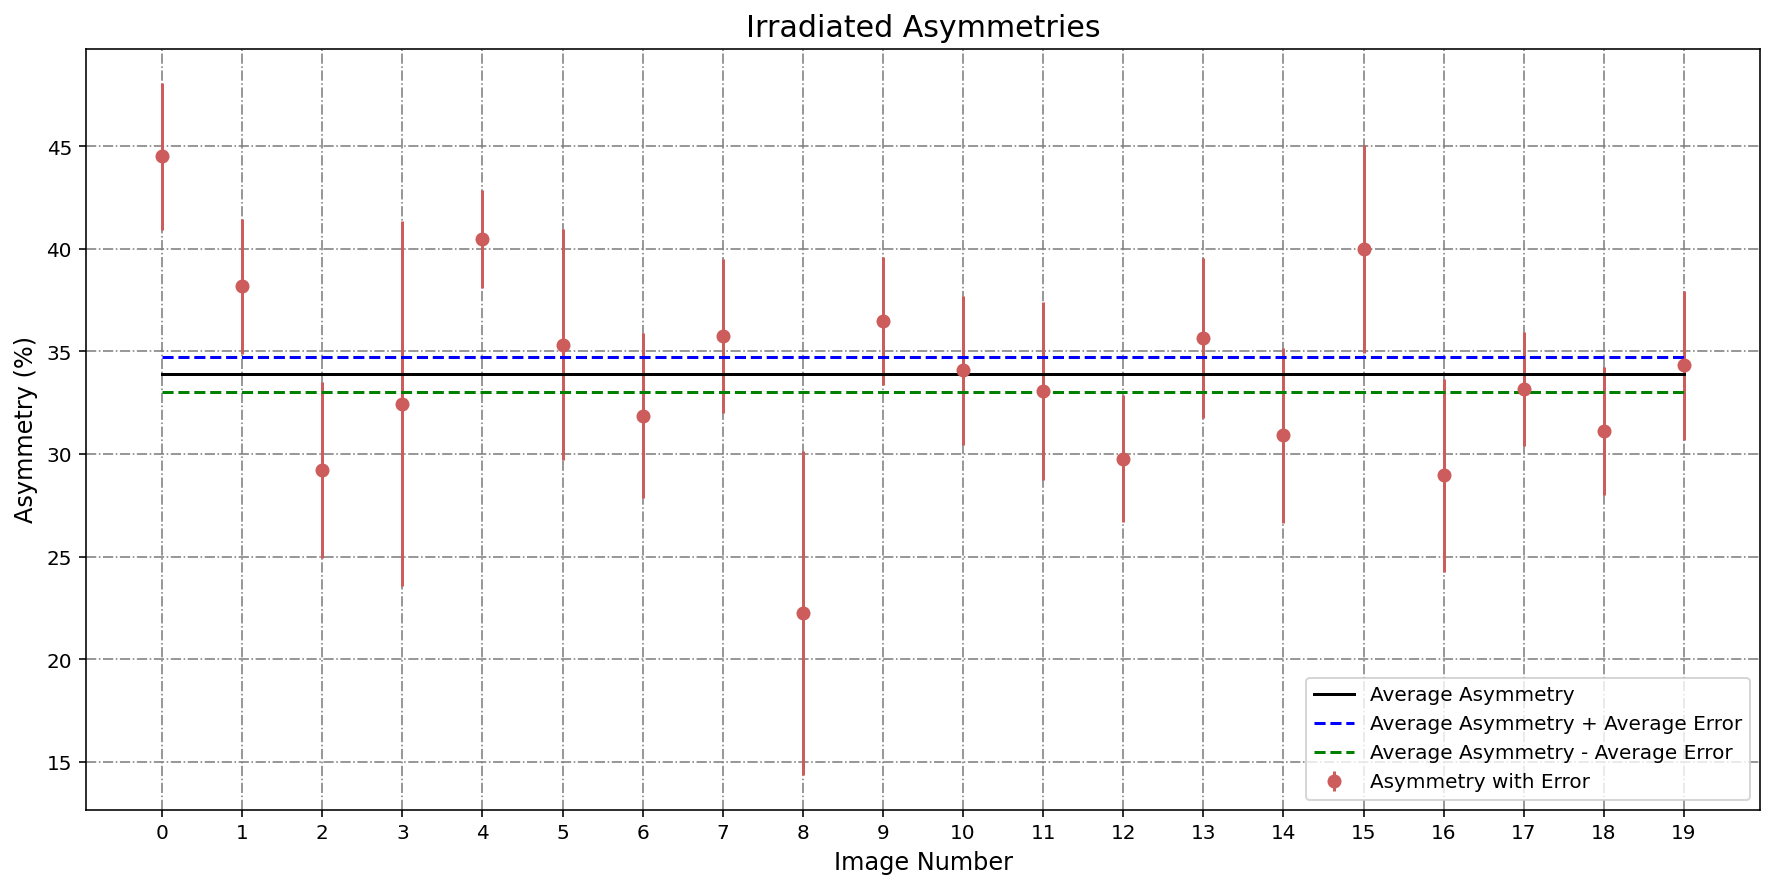

 
Date and time 2021-05-12 13:13:22.010960
Time since last check is 0:00:00.377596


In [23]:
import datetime
now = datetime.datetime.now()
print("Date and time",str(now))
print("")

xPlot = np.linspace(0, len(irr[2]) - 1, len(irr[2]))
yOnes = np.ones(len(irr[2]))


fig = plt.figure( figsize = (15,7))
plt.title("Irradiated Asymmetries", fontsize = 15)
plt.errorbar(xPlot, irr[2], yerr = irr[4], linestyle = '', color = 'indianred', marker = 'o',\
             label = 'Asymmetry with Error')
plt.plot(xPlot, irr_av*yOnes, linestyle = '-', color = 'k', label = 'Average Asymmetry')
plt.plot(xPlot, (irr_av + irr_avErr)*yOnes, linestyle = '--', color = 'b', \
         label = 'Average Asymmetry + Average Error')
plt.plot(xPlot, (irr_av - irr_avErr)*yOnes, linestyle = '--', color = 'g',\
         label = 'Average Asymmetry - Average Error')
plt.xlabel("Image Number", fontsize = 12)
plt.ylabel("Asymmetry (%)", fontsize = 12)
plt.legend(loc = 'lower right')
plt.xticks(np.arange(0, 20, step = 1))
plt.grid(color = 'grey', linestyle = '-.')
plt.show()

#EQUIVALENT CODE FOR CONTROL BATCH
#xPlot = np.linspace(0, len(ctrl[2]) - 1, len(ctrl[2]))
#yOnes = np.ones(len(ctrl[2]))
#
#
#fig = plt.figure( figsize = (15,7))
#plt.title("Control Asymmetries", fontsize = 15)
#plt.errorbar(xPlot, ctrl[2], yerr = ctrl[4], linestyle = '', color = 'indianred', marker = 'o'label = 'Asymmetry with Error')
#plt.plot(xPlot, ctrl_av*yOnes, linestyle = '-', color = 'k', label = 'Average Asymmetry')
#plt.plot(xPlot, (ctrl_av + ctrl_avErr)*yOnes, linestyle = '--', color = 'b', label = 'Average Asymmetry + Average Error')
#plt.plot(xPlot, (ctrl_av - ctrl_avErr)*yOnes, linestyle = '--', color = 'g', label = 'Average Asymmetry - Average Error')
#plt.xlabel("Image Number", fontsize = 12)
#plt.ylabel("Asymmetry (%)", fontsize = 12)
#plt.legend(loc = 'lower right')
#plt.xticks(np.arange(0, 20, step = 1))
#plt.grid(color = 'grey', linestyle = '-.')
#plt.show()

then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))